# Домашнее задание 2. Нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [87]:
from sklearn.model_selection import train_test_split
import torch

data = pd.read_csv("Fish.csv")


def get_X_Y(data, tensor_flag = False):
    X = data.drop('Weight', axis=1)
    X = X.drop('Species', axis=1)
    
    Y = data['Weight']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    if tensor_flag:
        X_train = torch.tensor(X_train.values, dtype=torch.float)
        Y_train = torch.tensor(Y_train.values, dtype=torch.float)
        Y_train = Y_train.reshape(len(Y_train), 1)

        X_test = torch.tensor(X_test.values, dtype=torch.float)
        Y_test = torch.tensor(Y_test.values, dtype=torch.float)
        Y_test = Y_test.reshape(len(Y_test), 1)
        
        
    return X_train, X_test, Y_train, Y_test

## 1.2 По необходимости проведите преодбработку/нормализацию данных

In [88]:
from sklearn.preprocessing import OneHotEncoder
from copy import copy

ohe = OneHotEncoder(sparse=False)
ohe_ftrs = ohe.fit_transform(data['Species'].values.reshape(-1,1))
tmp = pd.DataFrame(ohe_ftrs, columns = ['dummy' + str(i) for i in range(ohe_ftrs.shape[1])])

data = pd.concat([data, tmp], axis=1)
print(len(data))


# Находим 95 квантиль и исключаем все что выше
quantile = data.quantile(q=0.95)
items = quantile.items()
prepared_data = data
for name, quantile_value in items:
    
    # Проверяем, что это не дополнительный стобец из OneHotEncoder
    if 'dummy' in name:
        continue
    prepared_data = prepared_data[prepared_data[name] <= quantile_value]
    
print(len(prepared_data))


159
135


## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [89]:
def train_network(model, optimizer_type, X, Y, count_epoch):
    if optimizer_type == 0:
        optimizer =  torch.optim.Adam(model.parameters(), lr = 0.1)
    if optimizer_type == 1:
        optimizer =  torch.optim.SGD(model.parameters(), lr = 0.1)
    if optimizer_type == 2:
        optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.1)
    if optimizer_type == 3:
        optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum = 0.8)
        
    loss_func = nn.MSELoss()
    for epoch in range(count_epoch):
        model.train()
        output = model.forward(X)
        loss = torch.sqrt(loss_func(output, Y))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if not ((epoch + 1) % 1000):
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, count_epoch, loss.item()))   
    print(loss.item())
    return loss.item()

def test_network(model, X, Y):
    loss_func = nn.MSELoss()
    output = model.forward(X)
    loss = torch.sqrt(loss_func(output, Y))
    return loss.item()


In [90]:
from torch import nn

model_1 = torch.nn.Sequential(
    nn.Linear(12,1)
)

model_2 = torch.nn.Sequential(
    nn.Linear(12,5), 
    nn.ReLU(), 
    nn.Linear(5, 1)
)

model_3 = torch.nn.Sequential(
    nn.Linear(12,15), 
    nn.ReLU(),
    nn.Linear(15, 8), 
    nn.ReLU(),
    nn.Linear(8, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
)


# Лучшая модель
model_4 = torch.nn.Sequential(
    nn.Linear(12,15), 
    nn.ReLU(),
    nn.Linear(15, 8), 
    nn.ReLU(),
    nn.Linear(8, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
)

models = [model_1, model_2, model_3, model_4]


Модель номер - 1
Процесс обучения:
Epoch [1000/3000], Loss: 110.5054
Epoch [2000/3000], Loss: 83.0173
Epoch [3000/3000], Loss: 69.6736
69.673583984375
Модель номер - 2
Процесс обучения:
Epoch [1000/3000], Loss: 33.4426
Epoch [2000/3000], Loss: 31.9538
Epoch [3000/3000], Loss: 31.8659
31.865907669067383
Модель номер - 3
Процесс обучения:
Epoch [1000/3000], Loss: 36.3977
Epoch [2000/3000], Loss: 33.3339
Epoch [3000/3000], Loss: 32.2687
32.268741607666016
Модель номер - 4
Процесс обучения:
Epoch [1000/3000], Loss: 32.0205
Epoch [2000/3000], Loss: 33.3067
Epoch [3000/3000], Loss: 31.9323
31.932279586791992
{0: 69.673583984375, 1: 31.865907669067383, 2: 32.268741607666016, 3: 31.932279586791992}
Модель номер - 1
Тест
Модель номер - 2
Тест
Модель номер - 3
Тест
Модель номер - 4
Тест
{0: 87.12366485595703, 1: 38.79762268066406, 2: 32.198604583740234, 3: 41.13227081298828}


Text(0.5, 1.0, 'loss')

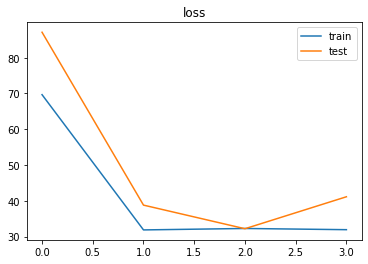

In [91]:
X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data, True)

loss_train_dict = dict()
for i, model in enumerate(models):
    print(f"Модель номер - {i + 1}")
    print("Процесс обучения:")
    loss = train_network(model=model, optimizer_type=0, X=X_train, Y=Y_train, count_epoch=3000)
    loss_train_dict[i] = loss
print(loss_train_dict)

loss_test_dict = dict()
for i, model in enumerate(models):
    print(f"Модель номер - {i + 1}")
    print("Тест")
    loss = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    
print(loss_test_dict)

plt.plot(loss_train_dict.keys(), loss_train_dict.values())
plt.plot(loss_test_dict.keys(), loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
    


## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

Модель номер - 1
Процесс обучения:
Epoch [1000/3000], Loss: 257.3305
Epoch [2000/3000], Loss: 255.2450
Epoch [3000/3000], Loss: 255.2449
255.2449188232422
Модель номер - 2
Процесс обучения:
Epoch [1000/3000], Loss: 257.3304
Epoch [2000/3000], Loss: 255.2450
Epoch [3000/3000], Loss: 255.2449
255.2449188232422
Модель номер - 3
Процесс обучения:
Epoch [1000/3000], Loss: 38.9782
Epoch [2000/3000], Loss: 31.5614
Epoch [3000/3000], Loss: 31.2725
31.272525787353516
Модель номер - 4
Процесс обучения:
Epoch [1000/3000], Loss: 30.4501
Epoch [2000/3000], Loss: 30.9032
Epoch [3000/3000], Loss: 30.4276
30.427600860595703

Модель номер - 1
Тест
Модель номер - 2
Тест
Модель номер - 3
Тест
Модель номер - 4
Тест


Text(0.5, 1.0, 'loss')

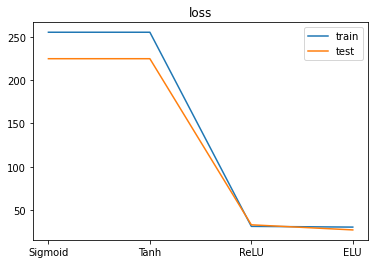

In [92]:
from torch import nn

activation_functions = [
    nn.Sigmoid(),
    nn.Tanh(),
    nn.ReLU(),
    nn.ELU()
]

models = []
for activation_function in activation_functions:
    model = torch.nn.Sequential(
        nn.Linear(12,15), 
        activation_function,
        nn.Linear(15, 8), 
        activation_function,
        nn.Linear(8, 5),
        activation_function,
        nn.Linear(5, 3),
        activation_function,
        nn.Linear(3, 1),
    )

    models.append(model)
    
X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data, True)

loss_train_dict = dict()
for i, model in enumerate(models):
    print(f"Модель номер - {i + 1}")
    print("Процесс обучения:")
    loss = train_network(model=model, optimizer_type=0, X=X_train, Y=Y_train, count_epoch=3000)
    loss_train_dict[i] = loss

print()

loss_test_dict = dict()
for i, model in enumerate(models):
    print(f"Модель номер - {i + 1}")
    print("Тест")
    loss = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    
keys = ['Sigmoid', 'Tanh', 'ReLU', 'ELU']
plt.plot(keys, loss_train_dict.values())
plt.plot(keys, loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
    

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

Модель номер - 1
Процесс обучения:
Epoch [1000/3000], Loss: 28.2560
Epoch [2000/3000], Loss: 35.0947
Epoch [3000/3000], Loss: 32.9005
32.900455474853516
Модель номер - 1
Тест
Модель номер - 2
Процесс обучения:
Epoch [1000/3000], Loss: 327.4926
Epoch [2000/3000], Loss: 293.2857
Epoch [3000/3000], Loss: 272.3338
272.3337707519531
Модель номер - 2
Тест
Модель номер - 3
Процесс обучения:
Epoch [1000/3000], Loss: 304.0974
Epoch [2000/3000], Loss: 262.4044
Epoch [3000/3000], Loss: 250.4348
250.43484497070312
Модель номер - 3
Тест
Модель номер - 4
Процесс обучения:
Epoch [1000/3000], Loss: 255.3521
Epoch [2000/3000], Loss: 250.5015
Epoch [3000/3000], Loss: 250.4127
250.4126739501953
Модель номер - 4
Тест
{0: 32.900455474853516, 1: 272.3337707519531, 2: 250.43484497070312, 3: 250.4126739501953}
{0: 36.460113525390625, 1: 285.59222412109375, 2: 240.57373046875, 3: 239.9304962158203}


Text(0.5, 1.0, 'loss')

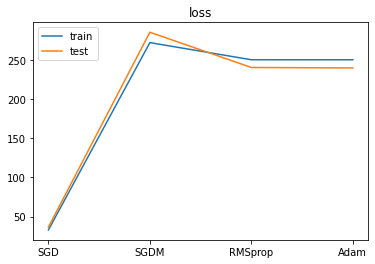

In [93]:
X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data, True)
loss_train_dict = dict()
loss_test_dict = dict()
for i in range(4):
    model = torch.nn.Sequential(
        nn.Linear(12,15), 
        nn.ReLU(),
        nn.Linear(15, 8), 
        nn.ReLU(),
        nn.Linear(8, 5),
        nn.ReLU(),
        nn.Linear(5, 3),
        nn.ReLU(),
        nn.Linear(3, 1),
    )
    

    print(f"Модель номер - {i + 1}")
    print("Процесс обучения:")
    loss = train_network(model=model, optimizer_type=i, X=X_train, Y=Y_train, count_epoch=3000)
    loss_train_dict[i] = loss

    print(f"Модель номер - {i + 1}")
    print("Тест")
    loss = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
print(loss_train_dict)   
print(loss_test_dict)

keys = ['SGD', 'SGDM', 'RMSprop', 'Adam']
plt.plot(keys, loss_train_dict.values())
plt.plot(keys, loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
    

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

Модель номер - 1
Процесс обучения:
Epoch [1000/3000], Loss: 15.9885
Epoch [2000/3000], Loss: 15.1745
Epoch [3000/3000], Loss: 14.9910
14.990970611572266
Модель номер - 2
Процесс обучения:
Epoch [1000/3000], Loss: 213.7359
Epoch [2000/3000], Loss: 128.6416
Epoch [3000/3000], Loss: 151.9062
151.90618896484375
Модель номер - 3
Процесс обучения:
Epoch [1000/3000], Loss: 276.4489
Epoch [2000/3000], Loss: 276.1649
Epoch [3000/3000], Loss: 262.7614
262.7613525390625
Модель номер - 4
Процесс обучения:
Epoch [1000/3000], Loss: 338.6175
Epoch [2000/3000], Loss: 290.5666
Epoch [3000/3000], Loss: 198.9131
198.91314697265625
Модель номер - 5
Процесс обучения:
Epoch [1000/3000], Loss: 251.2294
Epoch [2000/3000], Loss: 246.4955
Epoch [3000/3000], Loss: 216.1595
216.15945434570312
{0: 14.990970611572266, 1: 151.90618896484375, 2: 262.7613525390625, 3: 198.91314697265625, 4: 216.15945434570312}

Модель номер - 1
Тест
Модель номер - 2
Тест
Модель номер - 3
Тест
Модель номер - 4
Тест
Модель номер - 5
Тес

Text(0.5, 1.0, 'loss')

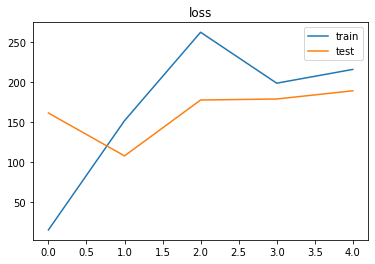

In [94]:
model_1 = torch.nn.Sequential(
        nn.Linear(12,15),
        nn.BatchNorm1d(15),
        nn.ReLU(),
        nn.Linear(15, 8),
        nn.BatchNorm1d(8),
        nn.ReLU(),
        nn.Linear(8, 5),
        nn.BatchNorm1d(5),
        nn.ReLU(),
        nn.Linear(5, 3),
        nn.BatchNorm1d(3),
        nn.ReLU(),
        nn.Linear(3, 1),
    )

model_2 = torch.nn.Sequential(
        nn.Linear(12,15),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(15, 8),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(8, 5),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(5, 3),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(3, 1),
    )

model_3 = torch.nn.Sequential(
        nn.Linear(12,15),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(15, 8),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(8, 5),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(5, 3),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(3, 1),
    )

model_4 = torch.nn.Sequential(
        nn.Linear(12,15),
        nn.BatchNorm1d(15),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(15, 8),
        nn.BatchNorm1d(8),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(8, 5),
        nn.BatchNorm1d(5),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(5, 3),
        nn.BatchNorm1d(3),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(3, 1),
    )

model_5 = torch.nn.Sequential(
        nn.Linear(12,15),
        nn.BatchNorm1d(15),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(15, 8),
        nn.BatchNorm1d(8),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(8, 5),
        nn.BatchNorm1d(5),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(5, 3),
        nn.BatchNorm1d(3),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(3, 1),
    )


models = [model_1, model_2, model_3, model_4, model_5]

X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data, True)

loss_train_dict = dict()
for i, model in enumerate(models):
    print(f"Модель номер - {i + 1}")
    print("Процесс обучения:")
    loss = train_network(model=model, optimizer_type=0, X=X_train, Y=Y_train, count_epoch=3000)
    loss_train_dict[i] = loss
print(loss_train_dict)

print()

loss_test_dict = dict()
for i, model in enumerate(models):
    print(f"Модель номер - {i + 1}")
    print("Тест")
    loss = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    
print(loss_test_dict)

plt.plot(loss_train_dict.keys(), loss_train_dict.values())
plt.plot(loss_train_dict.keys(), loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')


## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

In [95]:
# Для финальной модели я выберу BatchNorm, 4 слоя, Adam, ELU

X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data, True)
final_model = torch.nn.Sequential(
        nn.Linear(12,15),
        nn.BatchNorm1d(15),
        nn.ELU(),
        nn.Linear(15, 8),
        nn.BatchNorm1d(8),
        nn.ELU(),
        nn.Linear(8, 5),
        nn.BatchNorm1d(5),
        nn.ELU(),
        nn.Linear(5, 3),
        nn.BatchNorm1d(3),
        nn.ELU(),
        nn.Linear(3, 1),
    )

train_loss = train_network(model=final_model, optimizer_type=0, X=X_train, Y=Y_train, count_epoch=3000)
test_loss = test_network(final_model, X_test, Y_test)
print(train_loss, test_loss)


Epoch [1000/3000], Loss: 5.1763
Epoch [2000/3000], Loss: 3.7256
Epoch [3000/3000], Loss: 3.0634
3.0634496212005615
3.0634496212005615 74.63737487792969


## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:*

Понял, что пока не понял как выбирать размерность и количество слоев. А с остальным все в порядке)

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [96]:
data = pd.read_csv("spam.csv", encoding='latin-1')

## 2.2 По необходимости проведите преодбработку/нормализацию данных

In [97]:
from sklearn.model_selection import train_test_split
from copy import copy

def get_verdict(some_str):
    if some_str == 'ham':
        return 0
    return 1

# Создадим новый столбец verdict либо 0, либо 1 (1 - спам)
data['verdict'] = [get_verdict(line) for line in data['v1']]


data_for_task_4 = copy(data)

# Получение train_test_split.
def get_X_Y_2(data, tensor_flag = False):
    X = data['v2']
    Y = data['verdict']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    
    # Перевод в тензоры для pytorch
    if tensor_flag:
        Y_train = torch.tensor(Y_train.values, dtype=torch.float)
        Y_train = Y_train.reshape(len(Y_train), 1)

        Y_test = torch.tensor(Y_test.values, dtype=torch.float)
        Y_test = Y_test.reshape(len(Y_test), 1)
    
        
    return X_train, X_test, Y_train, Y_test

from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

cv = CountVectorizer()
cv.fit(data['v2'])
print(len(cv.vocabulary_))

def get_X_tensor(X_train, X_test):
    X_train = cv.transform(X_train)
    X_test = cv.transform(X_test)
    
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    X_train = torch.tensor(X_train, dtype=torch.float)
    X_test = torch.tensor(X_test, dtype=torch.float)
    return X_train, X_test


8672


## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [98]:
def acc_count(output, b_y):
    acc_count = 0
    pred_y = output.reshape(-1)
    real_y = b_y.reshape(-1)
    
    for i in range(len(pred_y)):
        if abs(real_y[i] - pred_y[i]) < 0.5:
            acc_count += 1
    return acc_count

def test(output, b_y):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    pred_y = output.reshape(-1)
    real_y = b_y.reshape(-1)
    for i in range(len(pred_y)):
        if pred_y[i] > 0.5 and real_y[i] > 0.5:
            tp += 1
        elif pred_y[i] > 0.5 and real_y[i] < 0.5:
            fp += 1
        elif pred_y[i] < 0.5 and real_y[i] > 0.5:
            fn += 1
        elif pred_y[i] < 0.5 and real_y[i] < 0.5:
            tn += 1
            
    print('acc =', (tn + tp) / (tn + fn + tp + fp)) 
    print('trp =', tp / (tp + fn + 0.0000001))
    print('prv =', tp / (tp + fp + 0.0000001))
    print('')

    
def train_network(model, optimizer_type, X, Y, count_epoch):
    print('training network')
    if optimizer_type == 0:
        optimizer =  torch.optim.Adam(model.parameters(), lr = 0.01)
    if optimizer_type == 1:
        optimizer =  torch.optim.SGD(model.parameters(), lr = 0.01)
    if optimizer_type == 2:
        optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01)
    if optimizer_type == 3:
        optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.8)
        
    loss_func = nn.BCELoss()
    for epoch in range(count_epoch):
        model.train()
        output = model(X)
        loss = loss_func(output, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if not ((epoch + 1) % 100):
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, count_epoch, loss.item()))   
    
    train_acc = acc_count(output, Y)
    test(output, Y)
    return loss.item(), train_acc/X_train.shape[0]

def test_network(model, X, Y):
    print('testing network')
    loss_func = nn.BCELoss()
    output = model.forward(X)
    loss = loss_func(output, Y)
    test_acc = acc_count(output, Y)
    test(output, Y)
    return loss.item(), test_acc/X_test.shape[0]


training network
acc = 0.9733004262957146
trp = 0.7996575341096477
prv = 0.9957356074635958

testing network
acc = 0.9417040358744395
trp = 0.6012269934961798
prv = 0.9999999989795919

training network
acc = 0.9952883105227731
trp = 0.9674657532589956
prv = 0.9964726629635852

testing network
acc = 0.989237668161435
trp = 0.957055214136776
prv = 0.9689440987770533

training network
acc = 0.8689701592999776
trp = 0.0
prv = 0.0

testing network
acc = 0.8538116591928251
trp = 0.0
prv = 0.0



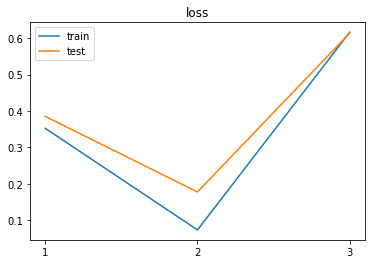

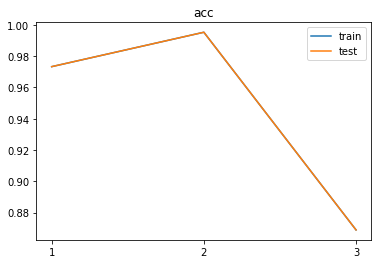

In [99]:
import torch.nn as nn

X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=True)

X_train, X_test = get_X_tensor(X_train, X_test)

model_1 = torch.nn.Sequential(
    nn.Linear(8672, 1),
    nn.Sigmoid()
)

model_2 = torch.nn.Sequential(
    nn.Linear(8672, 1000), 
    nn.Sigmoid(),
    nn.Linear(1000, 1), 
    nn.Sigmoid()
)

model_3 = torch.nn.Sequential(
    nn.Linear(8672, 1000), 
    nn.Sigmoid(),
    nn.Linear(1000, 5), 
    nn.Sigmoid(),
    nn.Linear(5, 1), 
    nn.Sigmoid()
)

# Слишком долго обучать.
model_4 = torch.nn.Sequential(
    nn.Linear(8672, 1000), 
    nn.Sigmoid(),
    nn.Linear(1000, 10), 
    nn.Sigmoid(),
    nn.Linear(10, 5), 
    nn.Sigmoid(),
    nn.Linear(5, 1), 
    nn.Sigmoid()
    
)

models = [model_1, model_2, model_3]


loss_train_dict = dict()
loss_test_dict = dict()

acc_train_dict = dict()
acc_test_dict = dict()
for i, model in enumerate(models):
    loss, acc = train_network(model, 0, X_train, Y_train, 10)
    loss_train_dict[i] = loss
    acc_train_dict[i] = acc
    
    loss, acc = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    acc_test_dict[i] = acc
    

keys = ['1', '2', '3']
plt.plot(keys, loss_train_dict.values())
plt.plot(keys, loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

keys = ['1', '2', '3']
plt.plot(keys, acc_train_dict.values())
plt.plot(keys, acc_train_dict.values())
plt.legend(['train', 'test'])
plt.title('acc')
plt.show()

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

training network
Epoch [100/100], Loss: 0.2809
acc = 0.9735247924612969
trp = 0.8036605655900732
prv = 0.9999999997929606

testing network
acc = 0.9479820627802691
trp = 0.6027397256145619
prv = 0.9999999988636364

training network
Epoch [100/100], Loss: 0.0752
acc = 0.9986538030065066
trp = 0.9900166387703799
prv = 0.9999999998319329

testing network
acc = 0.9856502242152466
trp = 0.8972602733580409
prv = 0.992424241672406

training network
Epoch [100/100], Loss: 0.0162
acc = 0.9993269015032533
trp = 0.9966722128125338
prv = 0.9983333331669445

testing network
acc = 0.9856502242152466
trp = 0.8904109582942391
prv = 0.9999999992307693

training network
Epoch [100/100], Loss: 0.0134
acc = 0.9995512676688355
trp = 0.9966722128125338
prv = 0.9999999998330551

testing network
acc = 0.9865470852017937
trp = 0.8972602733580409
prv = 0.9999999992366413



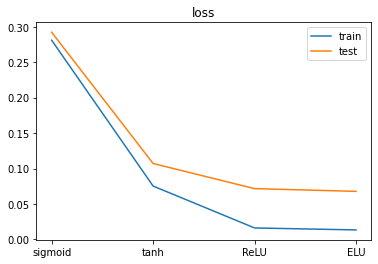

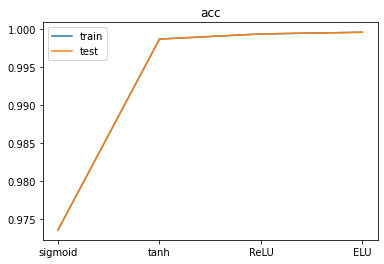

In [100]:
X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=True)

X_train, X_test = get_X_tensor(X_train, X_test)

model_1 = torch.nn.Sequential(
    nn.Linear(8672, 2), 
    nn.Sigmoid(),
    nn.Linear(2, 1), 
    nn.Sigmoid()
)

model_2 = torch.nn.Sequential(
    nn.Linear(8672, 2), 
    nn.Tanh(),
    nn.Linear(2, 1), 
    nn.Sigmoid()
)

model_3 = torch.nn.Sequential(
    nn.Linear(8672, 2), 
    nn.ReLU(),
    nn.Linear(2, 1), 
    nn.Sigmoid()
)

model_4 = torch.nn.Sequential(
    nn.Linear(8672, 2), 
    nn.ELU(),
    nn.Linear(2, 1), 
    nn.Sigmoid()
)


models = [model_1, model_2, model_3, model_4]

loss_train_dict = dict()
loss_test_dict = dict()

acc_train_dict = dict()
acc_test_dict = dict()
for i, model in enumerate(models):
    loss, acc = train_network(model, 0, X_train, Y_train, 100)
    loss_train_dict[i] = loss
    acc_train_dict[i] = acc
    
    loss, acc = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    acc_test_dict[i] = acc
    
    
keys = ['sigmoid', 'tanh', 'ReLU', 'ELU']
plt.plot(keys, loss_train_dict.values())
plt.plot(keys, loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

keys = ['sigmoid', 'tanh', 'ReLU', 'ELU']
plt.plot(keys, acc_train_dict.values())
plt.plot(keys, acc_train_dict.values())
plt.legend(['train', 'test'])
plt.title('acc')
plt.show()

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

Sequential(
  (0): Linear(in_features=8672, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)
training network
Epoch [100/100], Loss: 0.1630
acc = 0.8651559344850797
trp = 0.0
prv = 0.0

testing network
acc = 0.8690582959641255
trp = 0.0
prv = 0.0

Sequential(
  (0): Linear(in_features=8672, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)
training network
Epoch [100/100], Loss: 0.6038
acc = 0.8651559344850797
trp = 0.0
prv = 0.0

testing network
acc = 0.8690582959641255
trp = 0.0
prv = 0.0

Sequential(
  (0): Linear(in_features=8672, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)
training network
Epoch [100/100], Loss: 0.0991
acc = 0.9995512676688355
trp = 0.9966722128125338
prv = 0.9999999998330551

testing network
acc = 0.9713004484304932
trp = 0.7808219172734097
prv = 0.9999

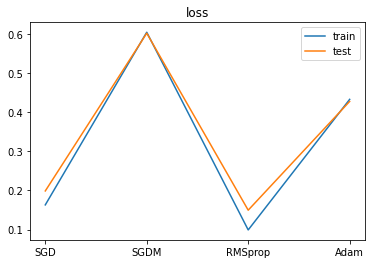

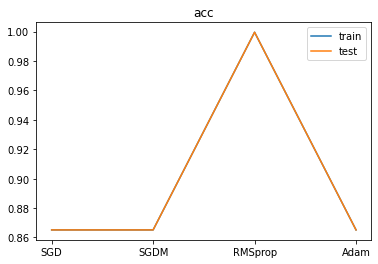

In [101]:
X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=True)

X_train, X_test = get_X_tensor(X_train, X_test)

loss_train_dict = dict()
loss_test_dict = dict()

acc_train_dict = dict()
acc_test_dict = dict()
for i in range(4):
    model = torch.nn.Sequential(
        nn.Linear(8672, 2), 
        nn.Sigmoid(),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )
    print(model)
    loss, acc = train_network(model, i, X_train, Y_train, 100)
    loss_train_dict[i] = loss
    acc_train_dict[i] = acc
    
    loss, acc = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    acc_test_dict[i] = acc
    
keys = ['SGD', 'SGDM', 'RMSprop', 'Adam']
plt.plot(keys, loss_train_dict.values())
plt.plot(keys, loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

keys = ['SGD', 'SGDM', 'RMSprop', 'Adam']
plt.plot(keys, acc_train_dict.values())
plt.plot(keys, acc_train_dict.values())
plt.legend(['train', 'test'])
plt.title('acc')
plt.show()
    

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

training network
Epoch [100/100], Loss: 0.2364
acc = 0.8703163562934709
trp = 0.0
prv = 0.0

testing network
acc = 0.8484304932735426
trp = 0.0
prv = 0.0

training network
Epoch [100/100], Loss: 0.2288
acc = 0.8703163562934709
trp = 0.0
prv = 0.0

testing network
acc = 0.8484304932735426
trp = 0.0
prv = 0.0

training network
Epoch [100/100], Loss: 0.3696
acc = 0.9255104330266996
trp = 0.4256055362585458
prv = 0.999999999593496

testing network
acc = 0.9067264573991032
trp = 0.3846153843878016
prv = 0.9999999984615385

training network
Epoch [100/100], Loss: 0.4714
acc = 0.8703163562934709
trp = 0.0
prv = 0.0

testing network
acc = 0.8484304932735426
trp = 0.0
prv = 0.0

training network
Epoch [100/100], Loss: 0.2914
acc = 0.8703163562934709
trp = 0.0
prv = 0.0

testing network
acc = 0.8484304932735426
trp = 0.0
prv = 0.0



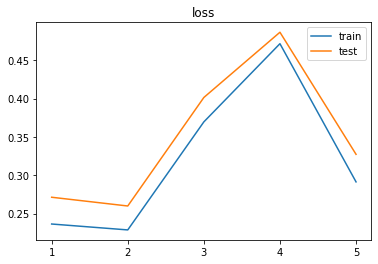

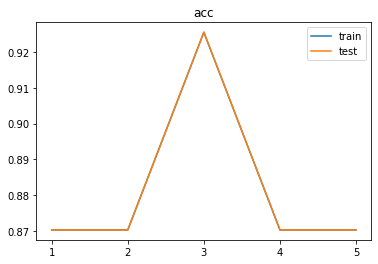

In [102]:
X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=True)

X_train, X_test = get_X_tensor(X_train, X_test)

model = torch.nn.Sequential(
        nn.Linear(8672, 2), 
        nn.Sigmoid(),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )



model_1 = torch.nn.Sequential(
        nn.Linear(8672, 2), 
        nn.BatchNorm1d(2),
        nn.Sigmoid(),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )

model_2 = torch.nn.Sequential(
        nn.Linear(8672, 2), 
        nn.Sigmoid(),
        nn.Dropout(0.2),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )

model_3 = torch.nn.Sequential(
        nn.Linear(8672, 2), 
        nn.Sigmoid(),
        nn.Dropout(0.5),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )

model_4 = torch.nn.Sequential(
        nn.Linear(8672, 2),
        nn.BatchNorm1d(2),
        nn.Sigmoid(),
        nn.Dropout(0.2),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )

model_5 = torch.nn.Sequential(
        nn.Linear(8672, 2),
        nn.BatchNorm1d(2),
        nn.Sigmoid(),
        nn.Dropout(0.5),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )

models = [model_1, model_2, model_3, model_4, model_5]

loss_train_dict = dict()
loss_test_dict = dict()
acc_train_dict = dict()
acc_test_dict = dict()
for i, model in enumerate(models):
    loss, acc = train_network(model, 0, X_train, Y_train, 100)
    loss_train_dict[i] = loss
    acc_train_dict[i] = acc
    
    loss, acc = test_network(model, X_test, Y_test)
    loss_test_dict[i] = loss
    acc_test_dict[i] = acc
    
keys = ['1', '2', '3', '4', '5']
plt.plot(keys, loss_train_dict.values())
plt.plot(keys, loss_test_dict.values())
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

keys = ['1', '2', '3', '4', '5']
plt.plot(keys, acc_train_dict.values())
plt.plot(keys, acc_train_dict.values())
plt.legend(['train', 'test'])
plt.title('acc')
plt.show()

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

In [103]:
# Возьмем 2 слоя, nn.Tanh(), RMSproop и nn.Dropout(0.2) и побольше эпох

X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=True)
X_train, X_test = get_X_tensor(X_train, X_test)

final_model = torch.nn.Sequential(
        nn.Linear(8672, 2), 
        nn.Tanh(),
        nn.Dropout(0.2),
        nn.Linear(2, 1), 
        nn.Sigmoid()
    )

loss, acc = train_network(final_model, 0, X_train, Y_train, 1000)
print(loss, acc)

loss, acc = test_network(final_model, X_test, Y_test)
print(loss, acc)

training network
Epoch [100/1000], Loss: 0.1043
Epoch [200/1000], Loss: 0.0603
Epoch [300/1000], Loss: 0.0472
Epoch [400/1000], Loss: 0.0369
Epoch [500/1000], Loss: 0.0329
Epoch [600/1000], Loss: 0.0325
Epoch [700/1000], Loss: 0.0274
Epoch [800/1000], Loss: 0.0221
Epoch [900/1000], Loss: 0.0260
Epoch [1000/1000], Loss: 0.0264
acc = 0.9928202827013687
trp = 0.945854483765507
prv = 0.9999999998211092

0.026430558413267136 0.9928202827013687
testing network
acc = 0.9766816143497757
trp = 0.8525641020175871
prv = 0.9779411757515138

0.11398082971572876 0.9766816143497757


## 2.8 Выводы

*Your beautiful thoughts:*

Благодаря этой части задания я стал понимать важность правильного расчета accuracy.
Изначально из-за моих ошибок модель не обучалась совсем, но accuracy был 0.86, так
как в обучающей выборке были неравномерно распределены данные по классам. 
После расчета Recall и Precision все стало на свои места. Ощутил, что модель может
реально долго обучаться и важность правильного подбора lr. Плюс Dropout ощутимо 
помогает от переобучения.